In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
news_text = pd.read_csv(r"C:\Users\okechukwu chude\Documents\Information Retrival\7071CEM-Publication-Search-Engine\bbc-text.csv")

In [3]:
news_text.head(5)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
news_text.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [5]:
news_text.isna().sum()

category    0
text        0
dtype: int64

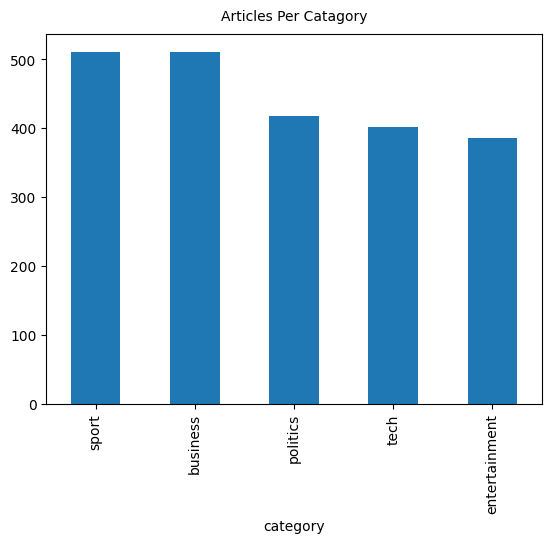

In [6]:
news_text['category'].value_counts().plot(kind='bar')
plt.title('Articles Per Catagory', size=10, pad=10);

Text Preprocessing

In [7]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
import string
import nltk

In [8]:
def preprocess_data(data_frame):
    # Replace newline and carriage return characters with spaces
    data_frame['cleaned_text'] = data_frame['text'].replace('\n', ' ')
    data_frame['cleaned_text'] = data_frame['cleaned_text'].replace('\r', ' ')

    # Convert text to lowercase
    data_frame['cleaned_text'] = data_frame['cleaned_text'].str.lower()

    # Remove punctuation
    punctuation = string.punctuation
    data_frame['cleaned_text'] = data_frame['cleaned_text'].str.translate(str.maketrans('', '', punctuation))

    # Stop words removal and lemmatization
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()

    def get_word_net_tag(word):
        tag = pos_tag([word])[0][1][0].upper()
        tag_mapping = {"N": wordnet.NOUN, "R": wordnet.ADV, "V": wordnet.VERB, "J": wordnet.ADJ}
        return tag_mapping.get(tag, wordnet.NOUN)

    def lemmatize_text(text):
        tokens = nltk.word_tokenize(text)
        processed_text = ""
        for word in tokens:
            if word not in stop_words:
                processed_text += lemmatizer.lemmatize(word, get_word_net_tag(word)) + " "
        return processed_text

    data_frame['lemmatized_text'] = data_frame['cleaned_text'].apply(lemmatize_text)


In [9]:
preprocess_data(news_text)

In [10]:
news_text.iloc[1]['text']

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [11]:
news_text.iloc[1]['cleaned_text']

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an 11bn £58bn fraud  never made accounting decisions  a witness has told jurors  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares mr myers has already pleaded guilty to fraud and is assisting prosecutors  on monday  defence lawyer reid weingarten tried to distance his client from the allegations during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision    not that i am aware of   mr myers replied  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed  no   replied the witness mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financial officer sc

Splitting The Data

In [12]:
X = news_text.text
y = news_text.category

#split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)
print(X_train)
print(y_train)

407     bush to get  tough  on deficit us president ge...
1065    bellamy under new fire newcastle boss graeme s...
1141    mandelson warns bbc on campbell the bbc should...
987     john peel replacement show begins the permanen...
2145    wales coach elated with win mike ruddock paid ...
                              ...                        
960     fed warns of more us rate rises the us looks s...
905     bets off after big brother  leak  a bookmaker ...
1096    internet boom for gift shopping cyberspace is ...
235     consumer spending lifts us growth us economic ...
1061    t in the park sells out in days tickets for sc...
Name: text, Length: 1557, dtype: object
407          business
1065            sport
1141         politics
987     entertainment
2145            sport
            ...      
960          business
905     entertainment
1096             tech
235          business
1061    entertainment
Name: category, Length: 1557, dtype: object


Vectorization 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

custom_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), min_df=3, max_df=1.0, max_features=10000)


Building the model

In [14]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import Pipeline

In [15]:
from sklearn.naive_bayes import MultinomialNB

# Assuming custom_vectorizer and X_train, y_train are defined earlier

def train_and_evaluate_with_naive_bayes():
    custom_model = MultinomialNB()
    custom_model_name = 'naive_bayes'
    
    custom_pipeline = Pipeline([('custom_vectorize', custom_vectorizer), (custom_model_name, custom_model)])
    
    evaluation_results = cross_validate(custom_pipeline,
                                       X_train,
                                       y_train,
                                       cv=KFold(shuffle=True, n_splits=3, random_state=9),
                                       scoring=('accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'),
                                       return_train_score=True)
    
    return evaluation_results

# Call the function to train and evaluate the pipeline with Naive Bayes
results_with_naive_bayes = train_and_evaluate_with_naive_bayes()
print(results_with_naive_bayes)


{'fit_time': array([0.83332276, 0.84872293, 0.83356452]), 'score_time': array([0.23400855, 0.22008371, 0.23397422]), 'test_accuracy': array([0.97880539, 0.95568401, 0.97687861]), 'train_accuracy': array([0.99132948, 0.98747592, 0.9894027 ]), 'test_f1_weighted': array([0.97867427, 0.95567726, 0.97688582]), 'train_f1_weighted': array([0.99133636, 0.98746119, 0.98939869]), 'test_precision_weighted': array([0.97882568, 0.95666718, 0.97710753]), 'train_precision_weighted': array([0.99137797, 0.9875388 , 0.9894093 ]), 'test_recall_weighted': array([0.97880539, 0.95568401, 0.97687861]), 'train_recall_weighted': array([0.99132948, 0.98747592, 0.9894027 ])}
